# Building a Contemporary Music Recommendation System

## Kaggle Dataset

We first begin by importing the necessary libraries, and the dataset of songs we will be using for this project. The dataset is retrieved from https://www.kaggle.com/datasets/ektanegi/spotifydata-19212020. It contains a dataset of 169k Spotify songs from 1921-2020, containing tracks from artists with 1 million+ listeners on Spotify. It was created using the Spotify Web API. 

We originally tried to utilize data from a 600k dataset of songs, but quickly realized that songs across cultures do not translate effectively. This dataset had songs from all languages, with no way to understand which song was English or not. When the user gives an English song to match, we wouldn't want to give them an Dutch song in return! Thus, we modified our dataset to have relevant songs in English, and the user will be able to choose from this set.

In [568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


songs_data = pd.read_csv("data.csv")

songs_data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [569]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

Now, we can see the different features of a song in the dataset. Each song has quantitative values for qualitative features - such as danceability and acousticness! We can use this to our advantage when recommending a song for the user. 

Next, we remove null values and duplicates from our dataset.

In [570]:
songs_data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [571]:
songs_data = songs_data.dropna()
songs_data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


There may be duplicate songs from different album release versions, and they have different IDs. For instance, there are two songs of Harry Styles' "Adore You." Thus, we remove duplicates based solely upon name of the song and the artist.

In [572]:
songs_data[songs_data['name'] == 'Adore You']

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87868,0.0237,['Harry Styles'],0.676,207133,0.771,0,3jjujdWJ72nww5eGnfs2E7,0.000007,8,0.102,-3.675,1,Adore You,88,2019-12-13,0.0483,99.048,0.569,2019
87883,0.0237,['Harry Styles'],0.676,207133,0.771,0,1M4qEo4HE3PRaCOM7EXNJq,0.000007,8,0.102,-3.675,1,Adore You,86,2019-12-06,0.0483,99.048,0.569,2019
97046,0.1110,['Miley Cyrus'],0.583,278747,0.655,0,5AnCLGg35ziFOloEnXK4uu,0.000004,0,0.113,-5.407,1,Adore You,70,2013-10-04,0.0315,119.759,0.201,2013


In [573]:
songs_data = songs_data.drop_duplicates(subset = ['name', 'artists'])
songs_data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.2100,"['LEGADO 7', 'Junior H']",0.795,218501,0.5850,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,-4.451,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.9340,2020
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020


In [574]:
songs_data[songs_data['name']=='Adore You']

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87868,0.0237,['Harry Styles'],0.676,207133,0.771,0,3jjujdWJ72nww5eGnfs2E7,0.000007,8,0.102,-3.675,1,Adore You,88,2019-12-13,0.0483,99.048,0.569,2019
97046,0.1110,['Miley Cyrus'],0.583,278747,0.655,0,5AnCLGg35ziFOloEnXK4uu,0.000004,0,0.113,-5.407,1,Adore You,70,2013-10-04,0.0315,119.759,0.201,2013


## Exploratory Data Analysis

Next, we attempt to analyze our dataset. Since we are hoping to create a contemporary song recommendation system, it would be useful to understand changes in music trends over time. We also group the songs by decade.

In [575]:
songs_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,156608.000000,156608.000000,1.566080e+05,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000
mean,0.495783,0.537458,2.310463e+05,0.487088,0.086905,0.163163,5.200967,0.207698,-11.393035,0.707505,31.156588,0.096316,116.896800,0.531012,1977.204511
std,0.376842,0.175659,1.221553e+05,0.267400,0.281697,0.309991,3.515506,0.177673,5.665935,0.454910,21.513933,0.154385,30.790044,0.262406,25.671797
min,0.000000,0.000000,5.991000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.095700,0.416000,1.706400e+05,0.262000,0.000000,0.000000,2.000000,0.098700,-14.514000,0.000000,12.000000,0.035000,93.363750,0.321000,1956.000000
50%,0.499000,0.547000,2.080405e+05,0.478000,0.000000,0.000214,5.000000,0.136000,-10.499000,1.000000,33.000000,0.045300,114.765500,0.543000,1978.000000
75%,0.890000,0.667000,2.625330e+05,0.708000,0.000000,0.092125,8.000000,0.264000,-7.132750,1.000000,48.000000,0.076800,135.750250,0.748000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,97.000000,0.969000,244.091000,1.000000,2020.000000


Here, we are taking the release date, which is in the format yyyy-mm-dd and converting it into an integer of just the year. This way, it is easier to group the songs by decade. 

In [576]:
type(songs_data['release_date'][0])


str

In [577]:
#standardize release-date strings (some which have year-month-date, and some with year) with just the year

songs_data.release_date.replace({'-.*': ''}, regex=True, inplace=True)

/var/folders/3d/ktsrmxpd10sgvt5jrfgqcwv40000gq/T/ipykernel_20050/2756862938.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [578]:
print(songs_data['release_date'])

0         1928
1         1928
2         1928
3         1928
4         1928
          ... 
169903    2020
169904    2020
169905    2020
169906    2020
169907    2020
Name: release_date, Length: 156608, dtype: object


In [579]:
songs_data['release_date'] = songs_data['release_date'].astype(int)
songs_data = songs_data.sort_values(by='release_date')

songs_data[songs_data['name']=='Adore You']


/var/folders/3d/ktsrmxpd10sgvt5jrfgqcwv40000gq/T/ipykernel_20050/3018967004.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
97046,0.1110,['Miley Cyrus'],0.583,278747,0.655,0,5AnCLGg35ziFOloEnXK4uu,0.000004,0,0.113,-5.407,1,Adore You,70,2013,0.0315,119.759,0.201,2013
87868,0.0237,['Harry Styles'],0.676,207133,0.771,0,3jjujdWJ72nww5eGnfs2E7,0.000007,8,0.102,-3.675,1,Adore You,88,2019,0.0483,99.048,0.569,2019


Next, we will observe how many songs there are for each decade, within this specific database. We will also observe trends within the song feature over time. This will be useful information when thinking about how to give the user a contemporary song.

<Axes: xlabel='decade', ylabel='count'>

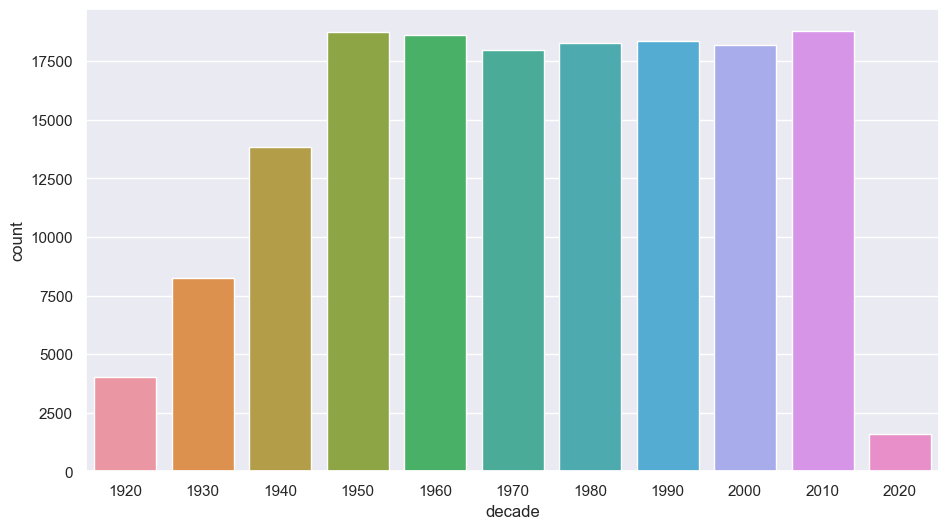

In [580]:
def get_decade(year):
    decade = int(year/10) * 10
    return decade

songs_data['decade'] = songs_data['release_date'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(x = 'decade', data = songs_data)

<Axes: xlabel='release_date', ylabel='tempo'>

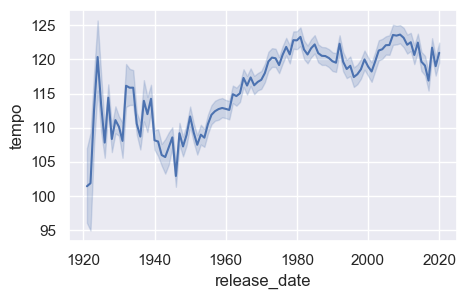

In [581]:
sns.set(rc={'figure.figsize':(5 ,3)})
sns.lineplot(x = "release_date", y = "tempo", data = songs_data)

<Axes: xlabel='release_date', ylabel='acousticness'>

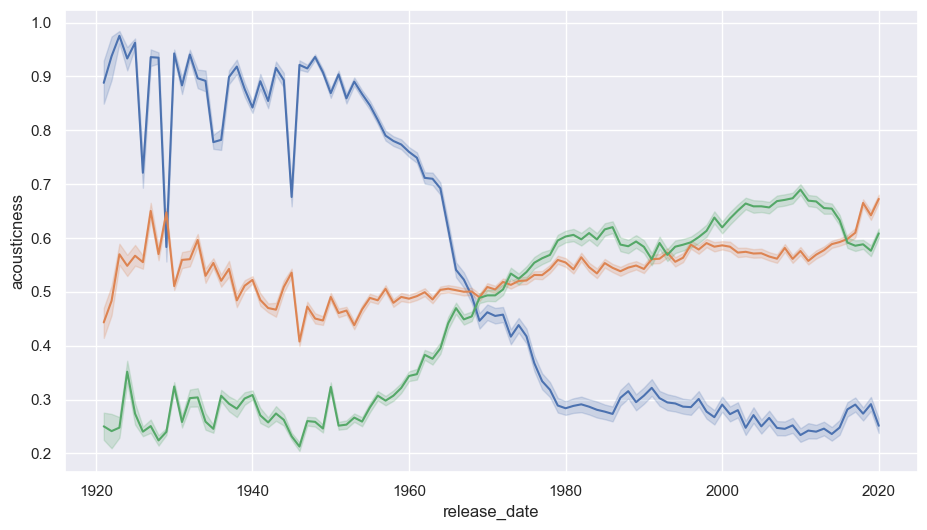

In [582]:
new_songsdf = songs_data.sample(n = 1000)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.lineplot(x = "release_date", y = "acousticness", data = songs_data)
sns.lineplot(x = "release_date", y = "danceability", data = songs_data)
sns.lineplot(x = "release_date", y = "energy", data = songs_data)

## Model 1: Similar Songs using K-Nearest Neighbors

The k-nearest neighbors (k-NN) algorithm finds similar elements given a certain query point, perfect for our usage! 

We will only query with songs from after 2015, as we are trying to give the user modern songs. This dataset is also quite large, so we will take a random tracks from the most modern decade. The query point for this algorithm will be the song that the user inputs. The k value is the number of similar songs that the user requests.

In [583]:
df = songs_data[songs_data['release_date'] > 2010]
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,decade
69754,0.00055,['Icon For Hire'],0.570,185080,0.904,0,4nPI6aIrHaMNZbF2q8NfpX,0.000000,5,0.3790,-4.377,0,Off With Her Head,47,2011,0.0746,92.948,0.840,2011,2010
96890,0.00115,['Seether'],0.630,229720,0.860,0,2abHKI9Oox4NBEhOh3HMbq,0.000001,0,0.2310,-6.117,1,Country Song,63,2011,0.0327,95.978,0.911,2011,2010
69751,0.03340,"['Snoop Dogg', 'Wiz Khalifa']",0.569,228733,0.691,1,2OmfRyHIFAkMEEwmbgz7lN,0.000000,1,0.1530,-6.462,0,That Good,49,2011,0.3180,180.056,0.189,2011,2010
96919,0.00285,['Tech N9ne'],0.746,326427,0.853,1,2Lo2BWhhlZSJds2yBhxoet,0.000000,1,0.3760,-4.452,1,Worldwide Choppers,60,2011,0.1300,130.028,0.362,2011,2010
69752,0.03950,['Radiohead'],0.693,319249,0.776,0,2rA36OZNb3LkvqcNro1ugK,0.737000,3,0.0884,-9.804,1,Separator,49,2011,0.0560,113.808,0.659,2011,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161409,0.03490,"['Kygo', 'Sandro Cavazza']",0.614,217766,0.709,0,745bEQatiiXDtBe1AdQY2P,0.000000,11,0.0904,-5.742,0,Beautiful,72,2020,0.0428,123.843,0.269,2020,2020
161410,0.00345,"['Elevation Worship', 'Brandon Lake']",0.286,452499,0.769,0,0pNizrRmvu5S16fH6ccm0v,0.000000,11,0.9110,-6.353,1,Graves Into Gardens (Live) (feat. Brandon Lake),67,2020,0.0539,139.442,0.128,2020,2020
161411,0.23800,"['Anuel AA', 'Farruko', 'Zion']",0.624,226160,0.888,1,5p3JJehpKHjr9pJT5eD2Lz,0.000000,2,0.3170,-2.130,1,Que Se Joda,75,2020,0.0990,180.088,0.824,2020,2020
161402,0.17600,['YoungBoy Never Broke Again'],0.738,145851,0.678,1,485RHcQUM5qotAlfutUhwT,0.000000,11,0.2500,-6.596,0,Ain't Easy,65,2020,0.1340,79.002,0.514,2020,2020


In [584]:
# Computes the distance from every song in the dataframe to the query song
# Uses the given columns as metrics for Euclidean distance

def queryCols(queryID, query_idx, songsData, columns, k):
    
    new_songs = songsData[columns].copy(deep=True)
    
    new_songs['dist'] = new_songs.apply(lambda x: np.linalg.norm(x-query_idx), axis=1)
    new_songs = new_songs.sort_values('dist')
    new_songs.drop_duplicates()
    
    return new_songs.head(k)


In [585]:
# Given the ID of a song, finds the index within the larger dataset
def findSongIdx(queryID, df):
    tmp = df.copy(deep=True)
    query_idx = (tmp.index[(tmp['id'] == queryID)].tolist())
    if(query_idx):
        return query_idx[0]
    
    return query_idx


# Given many indices of songs, returns song names and IDs
# Used for easier output of similar songs
def songNames(df, song_arr):
    song_ids = []
    song_names = []
    
    for idx in song_arr:
        df_row = df.loc[[idx]]
        song_names.append((df_row['name'], df_row['artists']))
        song_ids.append(df.at[idx,'id'])
        
    return song_names, song_ids

# Given a song ID, and the number of desired similar songs, outputs new songs based upon kNN algorithm
# Compiles the above functions
def querykNN(song_ID, k):
    columns = ['instrumentalness', 'energy', 'key','danceability','liveness','loudness', 'speechiness','valence', 'popularity']
    
    idx = findSongIdx(song_ID, songs_data)
    
    querySong = songs_data[columns].loc[idx]
    
    new_recs = queryCols(song_ID, querySong, df, columns, k)
    
    songs_names, song_ids = songNames(df, new_recs.index.values)
    
    return new_recs, songs_names, song_ids
    
    

We previously looked at various instances of "Adore You." Let's test out the k-nearest neighbors algorithm with Miley Cyrus's "Adore You," released in 2013. We will ask for the 10 most similar songs.

In [586]:
new_recs, new_names, new_ids = querykNN('5AnCLGg35ziFOloEnXK4uu', 10)
print(new_names)

[(97046    Adore You
Name: name, dtype: object, 97046    ['Miley Cyrus']
Name: artists, dtype: object), (32185    About Love - From The Netflix Film “To All The...
Name: name, dtype: object, 32185    ['MARINA']
Name: artists, dtype: object), (169532    Chained To The Rhythm
Name: name, dtype: object, 169532    ['Katy Perry', 'Skip Marley']
Name: artists, dtype: object), (135323    Teenager in Love
Name: name, dtype: object, 135323    ['Madison Beer']
Name: artists, dtype: object), (87364    I Like The Sound Of That
Name: name, dtype: object, 87364    ['Rascal Flatts']
Name: artists, dtype: object), (8139    La Estoy Pasando Mal
Name: name, dtype: object, 8139    ['Grupo Firme']
Name: artists, dtype: object), (161301    VOICES (feat. XXXTENTACION)
Name: name, dtype: object, 161301    ['Skye', 'XXXTENTACION']
Name: artists, dtype: object), (126107    BIG
Name: name, dtype: object, 126107    ['Young M.A']
Name: artists, dtype: object), (87073    Keep Your Head Up
Name: name, dtype: object

Let's test this with a song from long ago, which is what this program is meant for. This is "Nocturne in E-flat major" by Frederic Chopin. It was composed in 1830-1832. This is a very popular arrangement on the piano; you may have heard it before!

In [598]:
new_recs, new_names, new_ids = querykNN('6xpA90VSHtmaUhNltHIcVM', 10)
new_names

[(47989    Liability
  Name: name, dtype: object,
  47989    ['Lorde']
  Name: artists, dtype: object),
 (169846    I Know You Care
  Name: name, dtype: object,
  169846    ['Ellie Goulding']
  Name: artists, dtype: object),
 (161479    Reality Check
  Name: name, dtype: object,
  161479    ['Swae Lee']
  Name: artists, dtype: object),
 (144279    Everybody's Gotta Learn Sometime
  Name: name, dtype: object,
  144279    ['G-Eazy']
  Name: artists, dtype: object),
 (55586    Orgelbüchlein - Arr. For Piano Four Hands by G...
  Name: name, dtype: object,
  55586    ['Johann Sebastian Bach', 'Lucas Jussen', 'Art...
  Name: artists, dtype: object),
 (32176    Losing - Joe Goddard Remix
  Name: name, dtype: object,
  32176    ['Becky Hill']
  Name: artists, dtype: object),
 (8108    Girls Need Love
  Name: name, dtype: object,
  8108    ['Summer Walker']
  Name: artists, dtype: object),
 (169826    Catalina
  Name: name, dtype: object,
  169826    ['ROSALÍA']
  Name: artists, dtype: object),

The first song, "Liability" by Lorde, is very similar! It is a great modern representation of "Nocturne in E-flat major," as it has the unique slow start with haunting piano.


However, when trying out the songs that matched, we found some are quite similar, but others do not give the same level of energy as the query song. This led us to the conclusion that some song features might need to be weighted higher than other features. Thus, we modify our k-NN algorithm


In [649]:
df2 = songs_data[songs_data['release_date'] > 2015]

def weightDistance(curr_row, query_idx):
    weightList = []
    weightList.append(np.linalg.norm(curr_row - query_idx))
    weightList.append(np.linalg.norm(curr_row['energy'] - query_idx['energy']))
    weightList.append(np.linalg.norm(curr_row['energy'] - query_idx['energy']))
    weightList.append(np.linalg.norm(curr_row['key'] - query_idx['key']))
    weight = np.mean(weightList)
    return weight
    

def distWeights(queryID, query_idx, songsData, columns, k):
    
    new_songs = songsData[columns].copy(deep=True)
    new_songs['dist'] = new_songs.apply(lambda x: weightDistance(x, query_idx), axis = 1)
    new_songs = new_songs.sort_values('dist')
    new_songs.drop_duplicates()
    
    return new_songs.head(k)

def queryWeight(song_ID, k):
    columns = ['instrumentalness', 'energy', 'key','danceability','liveness','loudness', 'speechiness','valence', 'popularity']
    
    idx = findSongIdx(song_ID, songs_data)
    
    querySong = songs_data[columns].loc[idx]
    
    new_recs = distWeights(song_ID, querySong, df, columns, k)
    
    songs_names, song_ids = songNames(df, new_recs.index.values)
    
    return new_recs, songs_names, song_ids

In [652]:
queryWeight('6xpA90VSHtmaUhNltHIcVM', 10)

(        instrumentalness  energy  key  danceability  liveness  loudness  \
 47989           0.000000  0.2040   10         0.578    0.1010   -12.363   
 169846          0.000003  0.2620    9         0.415    0.1060   -12.530   
 161479          0.000000  0.4160    9         0.539    0.1880   -11.142   
 55586           0.854000  0.0144    9         0.402    0.0672   -29.837   
 70599           0.000010  0.6970   11         0.881    0.2740    -8.374   
 32176           0.001360  0.4740    9         0.848    0.0557    -9.727   
 16217           0.000037  0.5500   11         0.569    0.2510    -6.172   
 144279          0.088600  0.4630    7         0.606    0.4810   -10.854   
 16212           0.000000  0.5330    9         0.446    0.4110    -8.229   
 48010           0.000000  0.5860   11         0.557    0.0719    -5.902   
 
         speechiness  valence  popularity      dist  
 47989        0.1340   0.3510           1  2.215911  
 169846       0.0333   0.3110           2  2.519123  


Now we have a working model that outputs the ten most similar songs since 2015! In order to be a decision-making program, however, we need to explain to the user how we found their new playlist.


## Explanation of Song Choice

We will employ an English explanation generator, similar to that of the VOTE program, to explain the song choice. We begin by describing the song features compared to the average for that song feature. For this, we will use quartile ranges as generated by the describe() function. We are only looking at the song features we used to calculate similarity within the k-NN algorithm.

In [588]:
columns = ['acousticness','danceability','energy','instrumentalness','liveness','loudness', 'speechiness','valence', 
          'tempo']
songs_avgs = songs_data[columns].describe()
songs_avgs

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
count,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000
mean,0.495783,0.537458,0.487088,0.163163,0.207698,-11.393035,0.096316,0.531012,116.896800
std,0.376842,0.175659,0.267400,0.309991,0.177673,5.665935,0.154385,0.262406,30.790044
min,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000
25%,0.095700,0.416000,0.262000,0.000000,0.098700,-14.514000,0.035000,0.321000,93.363750
50%,0.499000,0.547000,0.478000,0.000214,0.136000,-10.499000,0.045300,0.543000,114.765500
75%,0.890000,0.667000,0.708000,0.092125,0.264000,-7.132750,0.076800,0.748000,135.750250
max,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,0.969000,1.000000,244.091000


Let's continue with our example of Miley Cyrus's "Adore You." We can see the values of the song features below. 

In [589]:
songs_data.loc[[findSongIdx('5AnCLGg35ziFOloEnXK4uu', songs_data)]]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,decade
97046,0.111,['Miley Cyrus'],0.583,278747,0.655,0,5AnCLGg35ziFOloEnXK4uu,0.000004,0,0.113,-5.407,1,Adore You,70,2013,0.0315,119.759,0.201,2013,2010


We could describe this song as such: this song has a high danceability factor, and is very popular! However, it has a low instrumentalness. 

Following this method, will now try and convert these metrics into readable sentences for the user.

In [590]:
def describe_song(song_id):
    
    new_columns = ['danceability', 'instrumentalness','loudness', 'tempo']
    
    
    song_idx = findSongIdx(song_id, songs_data)
    curr_song = songs_data.loc[[song_idx]]
    very_low = songs_avgs.loc['min']
    low = songs_avgs.loc['25%']
    avg = songs_avgs.loc['50%']
    high = songs_avgs.loc['75%']
    very_high = songs_avgs.loc['max']
    
    result = ''
    
    
    for feature in new_columns:
        
        curr_val = songs_data.at[song_idx, feature]
        
        phrases = {
        "VERY_HIGH": [f"Wow! This song has incredible levels of {feature}.",
                      f"Wow! This song is very high in {feature}. Much higher than the average for songs."
                     ],
            
        "HIGH":[f"This song has high levels of {feature}.",
                f"This song is above average in terms of {feature}."
               ],
            
        "HIGH_D": [f"This song is very danceable, meaning, it is very high energy for its time!",
                    f"If I were living during this decade, I would certainly want to dance to it! It is very high energy.",
                    f"Let's party! This song is very danceable and high in energy."
                   ],
            
        "LOW_D": [f"Energy-wise, this song is danceable, but nothing special. It is consistent with the average song energy and danceability."
                  f"This song is average in terms of energy. Maybe the mood is more calm and casual today!.",
                  f"This is a slower, more chill song. Not very high energy in terms of the average for songs!."
                  f"If I were going to a party during this decade, I don't think I would want this song playing. That is, this song is relatively low energy."
                  ],
        "LOW": [f"This song is alright in terms of {feature}.",
                f"In terms of {feature}, this song is quite average."
               ],
        "VERY_LOW": [f"This song is very very low for {feature}.",
                     f"Unfortunately (or fortunately!) this song is quite low for {feature}."
                    ]

        }
        
        label = "AVG"
        
        if (feature == 'danceability'):
            
            if curr_val > avg[feature]:
                label = "HIGH_D"
            elif curr_val <= avg[feature]:
                label = "LOW_D"
        
        else:
            
            if curr_val > high[feature]:
                label = "VERY_HIGH"
                
            elif curr_val > avg[feature]:
                label = "HIGH"
                
            elif curr_val > low[feature]:
                label = "LOW"
                
            elif curr_val > very_low[feature]:
                label = "VERY_LOW"
                

        result += random.choice(phrases[label]) + " "

    return result
            
            
    

In [591]:
songs_data.loc[[findSongIdx('5AnCLGg35ziFOloEnXK4uu', songs_data)]]

describe_song('5AnCLGg35ziFOloEnXK4uu')

'If I were living during this decade, I would certainly want to dance to it! It is very high energy. In terms of instrumentalness, this song is quite average. Wow! This song has incredible levels of loudness. This song is above average in terms of tempo. '

Now we have a description for the song the user gives us. 

We will now try to explain the output we are giving the user. We hope to describe the similarities between the new songs and the given song, reasoning why these are appropriate matches from the modern time!

In [592]:
def describe_similar_song(org_song, new_songs){
    
}

SyntaxError: expected ':' (3011489102.py, line 1)

## Model 2: Relative Modern Songs based on Decade Trends

Currently, we can output similar songs based on tempo, valence, danceability, and other factors. However, this does not take into changing music trends over time. Here, we attempt to build a second model that finds a modern song relative to the averages for each decade. So, we find the given song in comparison to the averages for that decade. Then, we extrapolate the differences and find a song with a similar distance from the modern decade's averages.

This comes with the caveat that the songs will not be similar. However, we would like to recommend to the user a song that fits within the current decade, with a similar vibe compared to the average!